In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [2]:
def convertToMatrix(data, step):
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)


In [3]:
step = 2
N=20
Tp = 5

In [4]:
t=np.arange(0,N)

#x=np.sin(0.02*t)+2*np.random.rand(N)
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
df = pd.DataFrame(x)
df.head()

0
0  1
1  2
2  3
3  4
4  5

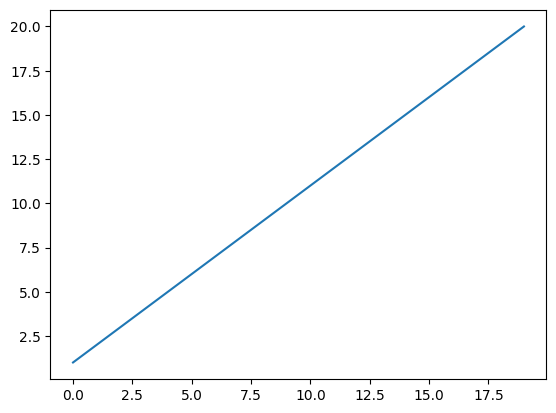

In [5]:
plt.plot(df)
plt.show()

In [6]:
values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]

In [7]:
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))

In [8]:
trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [9]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
model.add(Dense(5, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1120      
                                                                 
 dense (Dense)               (None, 5)                 165       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,291
Trainable params: 1,291
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(trainX,trainY, epochs=100, batch_size=20, verbose=2,validation_data = (testX,testY))
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

Epoch 1/100
1/1 - 1s - loss: 64.6590 - accuracy: 0.0000e+00 - val_loss: 809.3533 - val_accuracy: 0.0000e+00 - 1s/epoch - 1s/step
Epoch 2/100
1/1 - 0s - loss: 59.3819 - accuracy: 0.0000e+00 - val_loss: 761.7911 - val_accuracy: 0.0000e+00 - 36ms/epoch - 36ms/step
Epoch 3/100
1/1 - 0s - loss: 55.8478 - accuracy: 0.0000e+00 - val_loss: 724.3228 - val_accuracy: 0.0000e+00 - 32ms/epoch - 32ms/step
Epoch 4/100
1/1 - 0s - loss: 53.0641 - accuracy: 0.0000e+00 - val_loss: 692.4773 - val_accuracy: 0.0000e+00 - 54ms/epoch - 54ms/step
Epoch 5/100
1/1 - 0s - loss: 50.7085 - accuracy: 0.0000e+00 - val_loss: 664.1432 - val_accuracy: 0.0000e+00 - 59ms/epoch - 59ms/step
Epoch 6/100
1/1 - 0s - loss: 48.6261 - accuracy: 0.0000e+00 - val_loss: 638.1830 - val_accuracy: 0.0000e+00 - 56ms/epoch - 56ms/step
Epoch 7/100
1/1 - 0s - loss: 46.7421 - accuracy: 0.0000e+00 - val_loss: 614.2407 - val_accuracy: 0.0000e+00 - 54ms/epoch - 54ms/step
Epoch 8/100
1/1 - 0s - loss: 45.0101 - accuracy: 0.0000e+00 - val_loss: 5

Epoch 63/100
1/1 - 0s - loss: 7.3028 - accuracy: 0.0000e+00 - val_loss: 91.5463 - val_accuracy: 0.0000e+00 - 49ms/epoch - 49ms/step
Epoch 64/100
1/1 - 0s - loss: 7.0038 - accuracy: 0.0000e+00 - val_loss: 87.5822 - val_accuracy: 0.0000e+00 - 56ms/epoch - 56ms/step
Epoch 65/100
1/1 - 0s - loss: 6.7083 - accuracy: 0.0000e+00 - val_loss: 83.7335 - val_accuracy: 0.0000e+00 - 69ms/epoch - 69ms/step
Epoch 66/100
1/1 - 0s - loss: 6.4204 - accuracy: 0.0000e+00 - val_loss: 80.0144 - val_accuracy: 0.0000e+00 - 75ms/epoch - 75ms/step
Epoch 67/100
1/1 - 0s - loss: 6.1439 - accuracy: 0.0000e+00 - val_loss: 76.3138 - val_accuracy: 0.0000e+00 - 61ms/epoch - 61ms/step
Epoch 68/100
1/1 - 0s - loss: 5.8695 - accuracy: 0.0000e+00 - val_loss: 72.7122 - val_accuracy: 0.0000e+00 - 65ms/epoch - 65ms/step
Epoch 69/100
1/1 - 0s - loss: 5.6025 - accuracy: 0.0000e+00 - val_loss: 69.2231 - val_accuracy: 0.0000e+00 - 64ms/epoch - 64ms/step
Epoch 70/100
1/1 - 0s - loss: 5.3451 - accuracy: 0.0000e+00 - val_loss: 65.8

In [11]:
predicted

array([[ 1.8482869],
       [ 2.746871 ],
       [ 3.6401591],
       [ 4.5186267],
       [ 4.761537 ],
       [ 6.2040668],
       [ 7.0452023],
       [ 7.8863378],
       [ 8.725829 ],
       [ 9.556664 ],
       [10.3875   ],
       [11.218335 ],
       [12.049169 ],
       [12.880005 ],
       [13.710839 ],
       [14.541676 ],
       [15.372509 ],
       [16.203346 ],
       [17.03418  ],
       [17.230503 ]], dtype=float32)

In [12]:
predict = []
for i in predicted:
    predict.append(np.round(i))
    

In [13]:
df , predict

(     0
 0    1
 1    2
 2    3
 3    4
 4    5
 5    6
 6    7
 7    8
 8    9
 9   10
 10  11
 11  12
 12  13
 13  14
 14  15
 15  16
 16  17
 17  18
 18  19
 19  20,
 [array([2.], dtype=float32),
  array([3.], dtype=float32),
  array([4.], dtype=float32),
  array([5.], dtype=float32),
  array([5.], dtype=float32),
  array([6.], dtype=float32),
  array([7.], dtype=float32),
  array([8.], dtype=float32),
  array([9.], dtype=float32),
  array([10.], dtype=float32),
  array([10.], dtype=float32),
  array([11.], dtype=float32),
  array([12.], dtype=float32),
  array([13.], dtype=float32),
  array([14.], dtype=float32),
  array([15.], dtype=float32),
  array([15.], dtype=float32),
  array([16.], dtype=float32),
  array([17.], dtype=float32),
  array([17.], dtype=float32)])

In [14]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

[1.0069055557250977, 0.0]


In [15]:
from sklearn.metrics import r2_score
print(r2_score(df,predicted))

0.9598708328249672


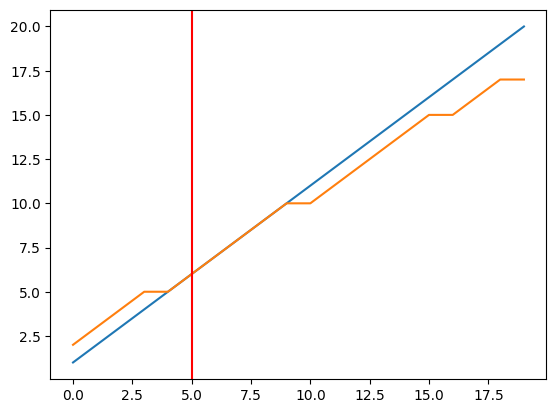

In [16]:
index = df.index.values
plt.plot(index,df)
plt.plot(index,predict)
plt.axvline(df.index[Tp], c="r")
plt.show()